In [127]:
# Classification with CNN
# Fashion MNist

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow_datasets as tfds
import pandas as pd
import seaborn as sns

In [128]:
f_mnist = tf.keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = f_mnist.load_data()

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3


In [6]:
# this is 2D array (but CNN needs 3D array)
# CNN needs height x and width x color
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1, 1)
(10000, 28, 28, 1, 1)


In [7]:
# k = len(np.unique(Y_train))
k = len(set(Y_train))
print("number of classes:", k)

print("shape: ",X_train[0].shape)

number of classes: 10
shape:  (28, 28, 1, 1)


In [5]:
# Build the model using functional API
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=15)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.7521 - loss: 0.8990 - val_accuracy: 0.8419 - val_loss: 0.4228
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8504 - loss: 0.4061 - val_accuracy: 0.8530 - val_loss: 0.3943
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8681 - loss: 0.3559 - val_accuracy: 0.8654 - val_loss: 0.3817
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8749 - loss: 0.3295 - val_accuracy: 0.8651 - val_loss: 0.3637
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8810 - loss: 0.3128 - val_accuracy: 0.8688 - val_loss: 0.3608
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8880 - loss: 0.2996 - val_accuracy: 0.8686 - val_loss: 0.3648
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8901 - loss: 0.2899 - val_accuracy: 0.8781 - val_loss: 0.3629
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8964 - loss: 0.2745 -

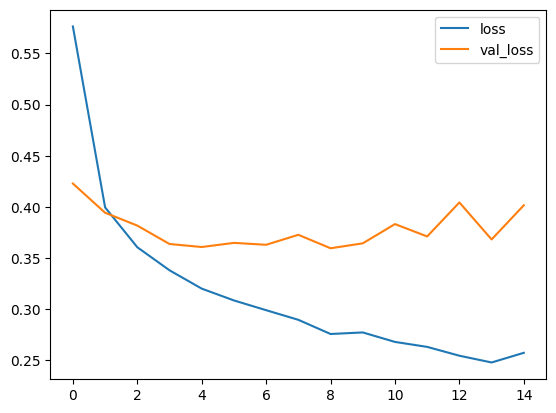

In [10]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


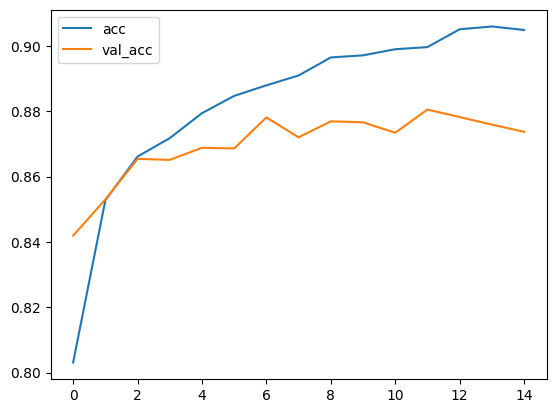

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [14]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(Y_test, Y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


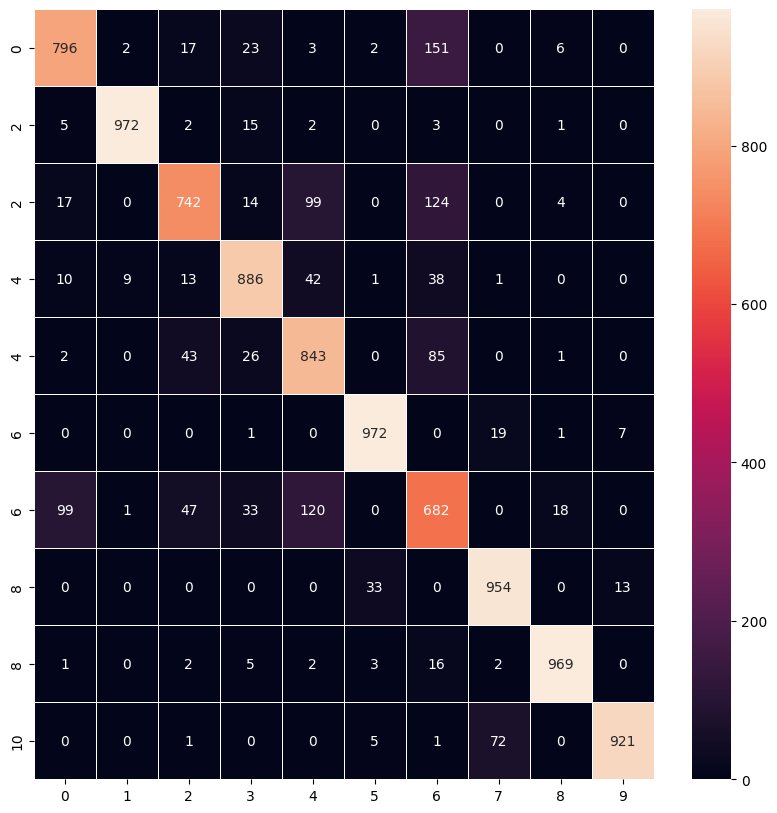

In [15]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size
sns.heatmap(cm, annot=True, linewidths=0.5, fmt="d", ax=ax) #fmt="d" to display the values in the heatmap as integers
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
plt.draw()
plt.show()




In [16]:
# pip install --upgrade scikit-learn

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix, without normalization
[[796   2  17  23   3   2 151   0   6   0]
 [  5 972   2  15   2   0   3   0   1   0]
 [ 17   0 742  14  99   0 124   0   4   0]
 [ 10   9  13 886  42   1  38   1   0   0]
 [  2   0  43  26 843   0  85   0   1   0]
 [  0   0   0   1   0 972   0  19   1   7]
 [ 99   1  47  33 120   0 682   0  18   0]
 [  0   0   0   0   0  33   0 954   0  13]
 [  1   0   2   5   2   3  16   2 969   0]
 [  0   0   1   0   0   5   1  72   0 921]]


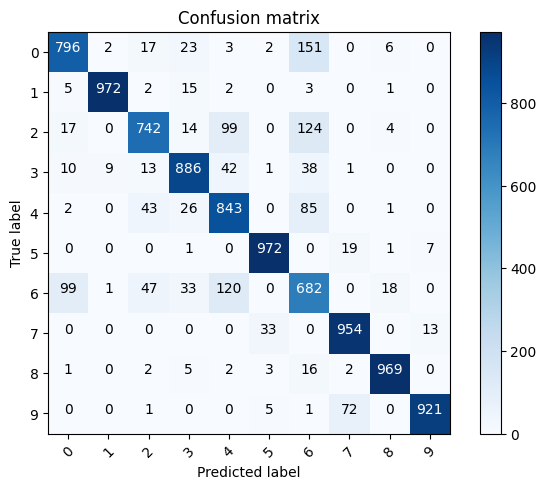

In [25]:
#predict
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [116]:
# Label mapping
labels = '''T-shirts/top
Trouser
Pullover
Dress
Coat
Sandal
Boot
Shirt'''.split()

labels

['T-shirts/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Boot',
 'Shirt']

misclassified examples count:  1263


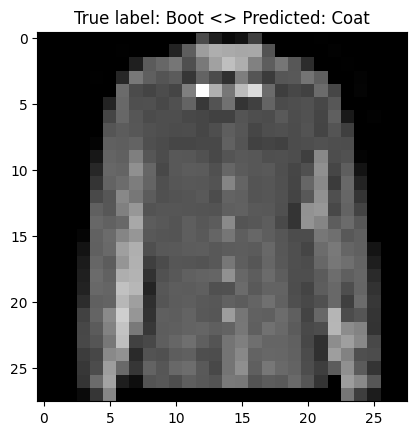

In [132]:
# show some misclassified example
misclassified_idx = np.where(p_test != Y_test)[0]
print("misclassified examples count: ", len(misclassified_idx))
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s <> Predicted: %s" % (labels[Y_test[i]], labels[p_test[i]]));


correct classified examples count:  8737


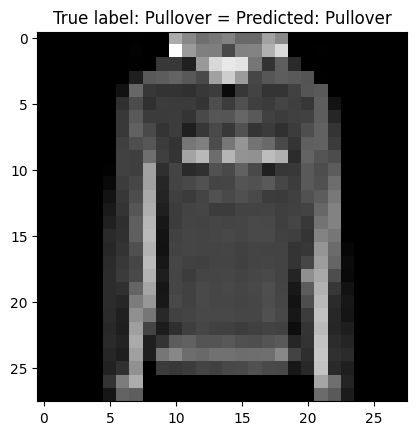

In [133]:
# show some correct classified example
ok  = np.where(p_test == Y_test)
not_ok  = np.where(p_test != Y_test)

corrclassified_idx = np.where(p_test == Y_test)[0]
print("correct classified examples count: ", len(corrclassified_idx))
i = np.random.choice(corrclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title("True label: %s = Predicted: %s" % (labels[Y_test[i]], labels[p_test[i]]));
